# XGBoost

## 1. Import packages, loading and spliting data

In [3]:
import sys
sys.path.append("jupy_env/lib/python3.8/site-packages")

import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve


import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBClassifier

In [4]:
df = pd.read_csv("./data/SUSY.csv", header=None)

In [5]:
columns=["signal", "lepton 1 pT", "lepton 1 eta", "lepton 1 phi", "lepton 2 pT", "lepton 2 eta", 
         "lepton 2 phi", "missing energy magnitude", "missing energy phi", "MET_rel", 
         "axial MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos(theta_r1)"]

df.columns = columns
df.head(5)

,signal,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


In [6]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
X_train_low = X_train.iloc[:,0:8]
X_train_high = X_train.iloc[:,8:]
X_test_low = X_test.iloc[:,0:8]
X_test_high = X_test.iloc[:,8:]

# Initialize the XGBClassifier

In [8]:
#n_estimators=100, max_depth=10, learning_rate=0.1,
 #                        verbosity=3, random_state=0, eval_metric = "auc"
estimator = XGBClassifier()


estimator.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

# Use low-level features

In [7]:
start_time = time.time()
estimator_low = estimator.fit(X_train_low,y_train)
time_low =  time.time() - start_time
print(time_low)

/home/kin/Desktop/Learning/Data_Mining_Course_Project/jupy_env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:15:20] DEBUG: ../src/gbm/gbtree.cc:155: Using tree method: 2
[14:15:28] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1950 extra nodes, 0 pruned nodes, max_depth=10
[14:15:36] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1972 extra nodes, 0 pruned nodes, max_depth=10
[14:15:46] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1984 extra nodes, 0 pruned nodes, max_depth=10
[14:15:55] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1952 extra nodes, 0 pruned nodes, max_depth=10
[14:16:05] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1970 extra nodes, 0 pruned nodes, max_depth=10
[14:16:13] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1936 extra nodes, 0 pruned nodes, max_depth=10
[14:16:22] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1938 extra nodes, 0 pruned nodes, max_depth=10
[14:16:29] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1962 extra nodes, 0 pruned nodes, max_depth=10
[14:16:

[14:24:15] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1304 extra nodes, 0 pruned nodes, max_depth=10
[14:24:22] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 984 extra nodes, 0 pruned nodes, max_depth=10
[14:24:29] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1670 extra nodes, 0 pruned nodes, max_depth=10
[14:24:36] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1146 extra nodes, 0 pruned nodes, max_depth=10
[14:24:43] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1016 extra nodes, 0 pruned nodes, max_depth=10
[14:24:50] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1106 extra nodes, 0 pruned nodes, max_depth=10
[14:24:57] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1270 extra nodes, 0 pruned nodes, max_depth=10
[14:25:05] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 916 extra nodes, 0 pruned nodes, max_depth=10
[14:25:12] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1296 

In [8]:
y_prob_low=estimator_low.predict_proba(X_test_low)
y_pred_low=estimator_low.predict(X_test_low)

In [9]:
table_low = confusion_matrix(y_test, y_pred_low)
table_low

array([[470794,  70975],
       [130941, 327290]])

In [10]:
accuracy_low = accuracy_score(y_pred_low, y_test)
print(accuracy_low)

0.798084


In [11]:
roc_low = roc_auc_score(y_test, y_prob_low[:,1])
print(roc_low)

0.8708338004016316


In [18]:
print(estimator_low.feature_importances_)
print(estimator_low.get_booster().feature_names)

[0.24053003 0.03514664 0.02695789 0.02446084 0.02689432 0.03316687
 0.5867282  0.0261152 ]
['lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT', 'lepton 2 eta', 'lepton 2 phi', 'missing energy magnitude', 'missing energy phi']


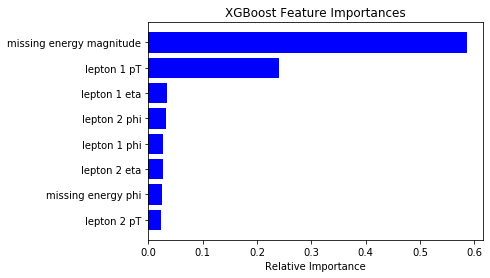

In [21]:
indices = np.argsort(estimator_low.feature_importances_)
plt.title('XGBoost Feature Importances')
plt.barh(range(len(indices)), estimator_low.feature_importances_[indices], color='b', align='center')
plt.yticks(range(len(indices)), [estimator_low.get_booster().feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Use high-level features

In [22]:
start_time = time.time()
estimator_high = estimator.fit(X_train_high,y_train)
time_high =  time.time() - start_time
print(time_high)

/home/kin/Desktop/Learning/Data_Mining_Course_Project/jupy_env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:33:01] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1824 extra nodes, 0 pruned nodes, max_depth=10
[14:33:12] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1812 extra nodes, 0 pruned nodes, max_depth=10
[14:33:22] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1776 extra nodes, 0 pruned nodes, max_depth=10
[14:33:33] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1830 extra nodes, 0 pruned nodes, max_depth=10
[14:33:46] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1774 extra nodes, 0 pruned nodes, max_depth=10
[14:33:59] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1786 extra nodes, 0 pruned nodes, max_depth=10
[14:34:10] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1772 extra nodes, 0 pruned nodes, max_depth=10
[14:34:20] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1772 extra nodes, 0 pruned nodes, max_depth=10
[14:34:30] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 174

[14:46:14] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 508 extra nodes, 0 pruned nodes, max_depth=10
[14:46:22] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 392 extra nodes, 0 pruned nodes, max_depth=10
[14:46:31] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 966 extra nodes, 0 pruned nodes, max_depth=10
[14:46:42] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 674 extra nodes, 0 pruned nodes, max_depth=10
[14:46:53] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 652 extra nodes, 0 pruned nodes, max_depth=10
[14:47:02] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 398 extra nodes, 0 pruned nodes, max_depth=10
[14:47:11] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 904 extra nodes, 0 pruned nodes, max_depth=10
[14:47:20] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 772 extra nodes, 0 pruned nodes, max_depth=10
[14:47:29] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1606 extra 

In [23]:
y_prob_high=estimator_high.predict_proba(X_test_high)
y_pred_high=estimator_high.predict(X_test_high)

In [24]:
table_high = confusion_matrix(y_test, y_pred_high)
table_high

array([[471955,  69814],
       [135607, 322624]])

In [25]:
accuracy_high = accuracy_score(y_pred_high, y_test)
print(accuracy_high)

0.794579


In [26]:
roc_high = roc_auc_score(y_test, y_prob_high[:,1])
print(roc_high)

0.8656736098893119


In [27]:
print(estimator_high.feature_importances_)
print(estimator_high.get_booster().feature_names)

[0.03101413 0.17899087 0.09728272 0.5243564  0.0260924  0.02212754
 0.01897777 0.02345055 0.0291258  0.04858185]
['MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']


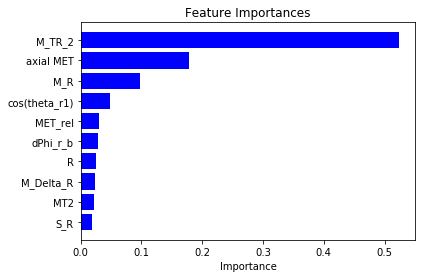

In [28]:
indices = np.argsort(estimator_high.feature_importances_)
plt.title('Feature Importances')
plt.barh(range(len(indices)), estimator_high.feature_importances_[indices], color='b', align='center')
plt.yticks(range(len(indices)), [estimator_high.get_booster().feature_names[i] for i in indices])
plt.xlabel('Importance')
plt.show()

# Use all features

In [30]:
start_time = time.time()
estimator_all = estimator.fit(X_train,y_train)
time_all =  time.time() - start_time
print(time_all)

/home/kin/Desktop/Learning/Data_Mining_Course_Project/jupy_env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:51:16] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1900 extra nodes, 0 pruned nodes, max_depth=10
[14:51:31] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1918 extra nodes, 0 pruned nodes, max_depth=10
[14:51:46] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1906 extra nodes, 0 pruned nodes, max_depth=10
[14:52:00] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1912 extra nodes, 0 pruned nodes, max_depth=10
[14:52:14] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1924 extra nodes, 0 pruned nodes, max_depth=10
[14:52:29] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1920 extra nodes, 0 pruned nodes, max_depth=10
[14:52:43] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1928 extra nodes, 0 pruned nodes, max_depth=10
[14:52:57] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1868 extra nodes, 0 pruned nodes, max_depth=10
[14:53:12] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 188

[15:11:24] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1000 extra nodes, 0 pruned nodes, max_depth=10
[15:11:42] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 828 extra nodes, 0 pruned nodes, max_depth=10
[15:12:04] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 738 extra nodes, 0 pruned nodes, max_depth=10
[15:12:24] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1302 extra nodes, 0 pruned nodes, max_depth=10
[15:12:41] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 676 extra nodes, 0 pruned nodes, max_depth=10
[15:13:00] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1452 extra nodes, 0 pruned nodes, max_depth=10
[15:13:19] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1360 extra nodes, 0 pruned nodes, max_depth=10
[15:13:36] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 996 extra nodes, 0 pruned nodes, max_depth=10
[15:13:55] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 586 ext

In [31]:
y_prob_all=estimator_all.predict_proba(X_test)
y_pred_all=estimator_all.predict(X_test)

In [32]:
table = confusion_matrix(y_test, y_pred_all)
table

array([[472630,  69139],
       [127153, 331078]])

In [33]:
accuracy_all = accuracy_score(y_pred_all, y_test)
print(accuracy_all)

0.803708


In [34]:
roc_all = roc_auc_score(y_test,y_prob_all[:,1])
print(roc_all)

0.8770114956257324


In [35]:
print(estimator_all.feature_importances_)
print(estimator_all.get_booster().feature_names)

[0.2764643  0.02193139 0.00209093 0.00518067 0.01717113 0.00207906
 0.47750065 0.00214069 0.0140071  0.05155162 0.00996108 0.01392665
 0.01404279 0.01734152 0.01733399 0.01301033 0.02095215 0.02331392]
['lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT', 'lepton 2 eta', 'lepton 2 phi', 'missing energy magnitude', 'missing energy phi', 'MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']


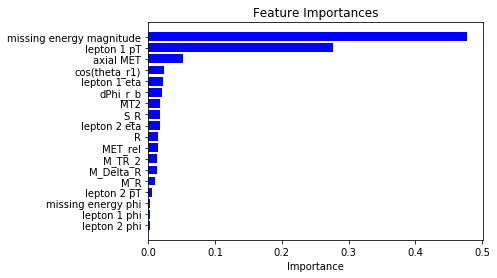

In [36]:
indices = np.argsort(estimator_all.feature_importances_)
plt.title('Feature Importances')
plt.barh(range(len(indices)), estimator_all.feature_importances_[indices], color='b', align='center')
plt.yticks(range(len(indices)), [estimator_all.get_booster().feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()